In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [4]:

df=pd.read_csv("AAPL.csv")
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-11,7.600000,7.607143,7.444643,7.503929,6.386731,462229600
1,2010-01-12,7.471071,7.491786,7.372143,7.418571,6.314083,594459600
2,2010-01-13,7.423929,7.533214,7.289286,7.523214,6.403146,605892000
3,2010-01-14,7.503929,7.516429,7.465000,7.479643,6.366062,432894000
4,2010-01-15,7.533214,7.557143,7.352500,7.354643,6.259671,594067600


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2510,2019-12-23,70.132500,71.062500,70.092499,71.000000,69.451073,98572000
2511,2019-12-24,71.172501,71.222504,70.730003,71.067497,69.517082,48478800
2512,2019-12-26,71.205002,72.495003,71.175003,72.477501,70.896339,93121200
2513,2019-12-27,72.779999,73.492500,72.029999,72.449997,70.869431,146266000
2514,2019-12-30,72.364998,73.172501,71.305000,72.879997,71.290047,144114400


In [ ]:
df = df.reset_index()
df.head()


,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
1,1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516527,601904800
2,2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412870,552160000
3,3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401017,477131200
4,4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443574,447610800


In [ ]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()


,index,Open,High,Low,Close,Volume
0,0,7.622500,7.660714,7.585000,7.643214,493729600
1,1,7.664286,7.699643,7.616071,7.656429,601904800
2,2,7.656429,7.686786,7.526786,7.534643,552160000
3,3,7.562500,7.571429,7.466071,7.520714,477131200
4,4,7.510714,7.571429,7.466429,7.570714,447610800


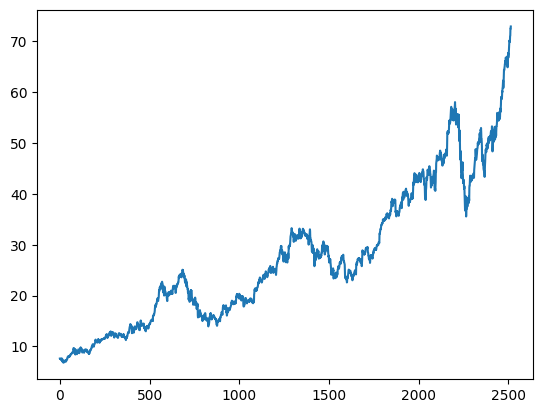

In [ ]:

plt.plot(df.Close)


In [ ]:
df


,index,Open,High,Low,Close,Volume
0,0,7.622500,7.660714,7.585000,7.643214,493729600
1,1,7.664286,7.699643,7.616071,7.656429,601904800
2,2,7.656429,7.686786,7.526786,7.534643,552160000
3,3,7.562500,7.571429,7.466071,7.520714,477131200
4,4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...,...
2510,2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,2513,72.779999,73.492500,72.029999,72.449997,146266000


In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

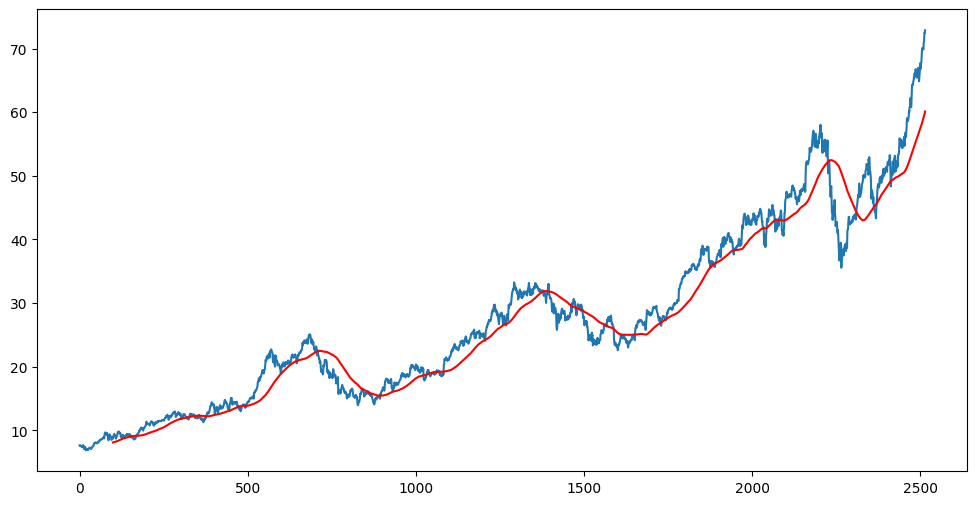

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

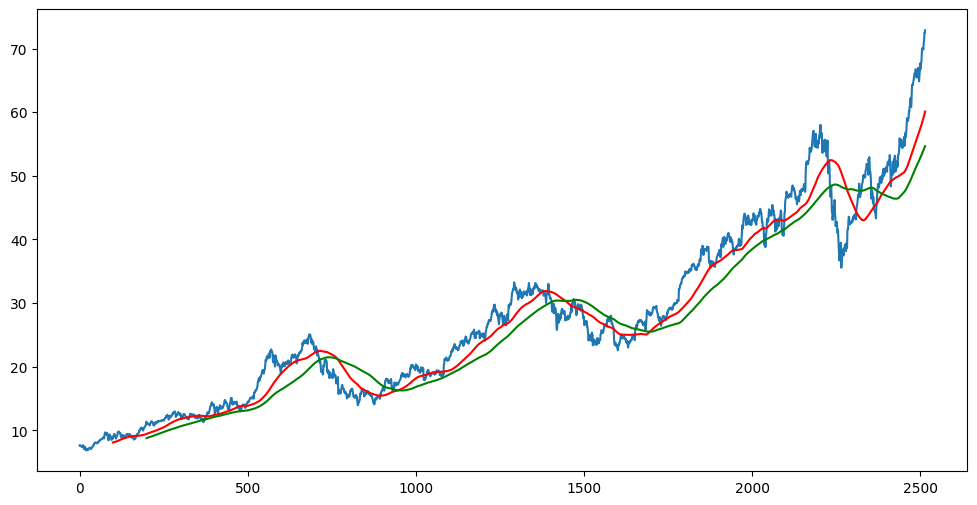

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')


In [ ]:
df.shape

(2515, 6)

In [ ]:

import pandas as pd

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [ ]:
data_training.head()


,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [ ]:

data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021855],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089658],
       [0.84616013]])

In [ ]:
data_training_array.shape

(1760, 1)

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential


In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 27s 380ms/step - loss: 0.0804
Epoch 2/50
52/52 [==============================] - 18s 353ms/step - loss: 0.0134
Epoch 3/50
52/52 [==============================] - 19s 358ms/step - loss: 0.0116
Epoch 4/50
52/52 [==============================] - 19s 362ms/step - loss: 0.0098
Epoch 5/50
52/52 [==============================] - 20s 382ms/step - loss: 0.0102
Epoch 6/50
52/52 [==============================] - 18s 350ms/step - loss: 0.0088
Epoch 7/50
52/52 [==============================] - 20s 386ms/step - loss: 0.0078
Epoch 8/50
52/52 [==============================] - 18s 349ms/step - loss: 0.0076
Epoch 9/50
52/52 [==============================] - 19s 372ms/step - loss: 0.0072
Epoch 10/50
52/52 [==============================] - 18s 349ms/step - loss: 0.0069
Epoch 11/50
52/52 [==============================] - 18s 352ms/step - loss: 0.0076
Epoch 12/50
52/52 [==============================] - 20s 381ms/step - loss: 0.0071
Epoch 13/50
5

In [ ]:
model.save('keras_model.h5')

In [ ]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [ ]:
data_training.tail(100)

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing, ignore_index=True)

<ipython-input-28-27e824f269e9>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [ ]:
final_df.head()


,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data


array([[0.02781468],
       [0.03015022],
       [0.02585065],
       [0.02547908],
       [0.02680612],
       [0.03370672],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855782],
       [0.03036257],
       [0.0260099 ],
       [0.02356815],
       [0.02022405],
       [0.01958705],
       [0.01523438],
       [0.01576519],
       [0.01910934],
       [0.02441748],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226184],
       [0.02558522],
       [0.04586231],
       [0.06603325],
       [0.06258296],
       [0.05547006],
       [0.05541698],
       [0.05531084],
       [0.06099054],
       [0.05085198],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803867],
       [0.05265677],
       [0.04984341],
       [0.05239134],
       [0.05265677],
       [0.05711558],
       [0.05801794],
       [0.06858118],
       [0.06990821],
       [0.07542864],
       [0.073

In [ ]:
input_data.shape

(855, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])


In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [ ]:
y_predicted = model.predict(x_test)

24/24 [==============================] - 4s 92ms/step


In [ ]:
y_predicted.shape

(755, 1)

In [ ]:
y_test

array([0.07219071, 0.06736029, 0.06911197, 0.06842189, 0.07155372,
       0.07845432, 0.08418706, 0.08482406, 0.08822127, 0.0855672 ,
       0.08445249, 0.0895483 , 0.0894952 , 0.08838051, 0.0895483 ,
       0.08997295, 0.08938906, 0.09952758, 0.09984611, 0.09989915,
       0.09820055, 0.09671429, 0.13599451, 0.13482672, 0.13774619,
       0.144169  , 0.15075113, 0.15345824, 0.15547537, 0.15388291,
       0.16009341, 0.16927655, 0.1718775 , 0.17102826, 0.17299223,
       0.17819418, 0.18037054, 0.17729182, 0.1779819 , 0.17941503,
       0.17973358, 0.1945963 , 0.19019063, 0.19454326, 0.19220766,
       0.19316317, 0.19040292, 0.18870427, 0.19114606, 0.19146452,
       0.19034986, 0.19815284, 0.19937369, 0.19565799, 0.20346098,
       0.19486173, 0.20324861, 0.20059454, 0.19910826, 0.20038224,
       0.215882  , 0.21758056, 0.21657199, 0.21513886, 0.21535114,
       0.22103089, 0.21704979, 0.21513886, 0.21344021, 0.21253785,
       0.20436334, 0.20526572, 0.20128462, 0.20542495, 0.20208

In [ ]:
y_predicted

array([[0.13909061],
       [0.13998437],
       [0.14085925],
       [0.14169456],
       [0.1424739 ],
       [0.14318699],
       [0.14383487],
       [0.14443025],
       [0.14499019],
       [0.14553331],
       [0.14607385],
       [0.14661781],
       [0.14717099],
       [0.14773867],
       [0.14832115],
       [0.1489159 ],
       [0.14951906],
       [0.1501247 ],
       [0.15073743],
       [0.15136829],
       [0.15202479],
       [0.1527071 ],
       [0.15340744],
       [0.15416709],
       [0.15505013],
       [0.15610668],
       [0.15735814],
       [0.1588121 ],
       [0.16049351],
       [0.16240144],
       [0.16448116],
       [0.16672835],
       [0.16913527],
       [0.17169197],
       [0.17437977],
       [0.17717457],
       [0.18005547],
       [0.18300366],
       [0.18599491],
       [0.18900159],
       [0.1919976 ],
       [0.19495843],
       [0.19788384],
       [0.20077537],
       [0.20363356],
       [0.20645338],
       [0.20922452],
       [0.211

In [ ]:
scaler.scale_

array([0.02123255])

In [ ]:
scale_factor = 1/0.02123255
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

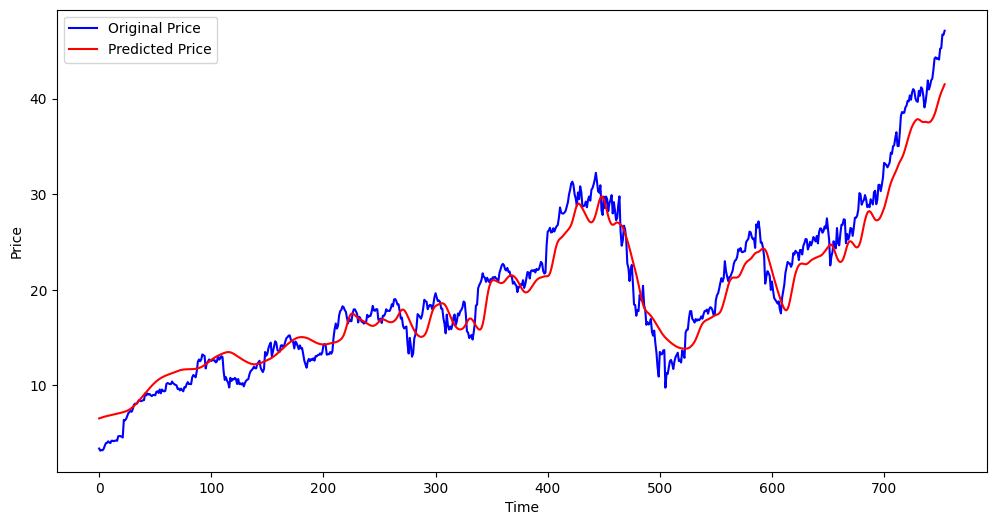

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()